<a href="https://colab.research.google.com/github/shiissaa/MAT421/blob/main/ModuleB(part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.4 Lagrange Polynomial Interpolation**

Lagrange polynomial interpolation differs from previous techniques in that rather than finding cubic polynomials between subsequent pairs of data points, it instead finds a single polynomial that goes through all the data points. This polynomial is referred to as the Lagrange polynomial.

For this example, we will find the Lagrange basis polymoials for the data set

x = [0, 1, 2], y = [2, 5, 4]

To find the coefficients (basis polynomials), we can use this formula:
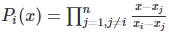

For our data set, it will look like this when solved: 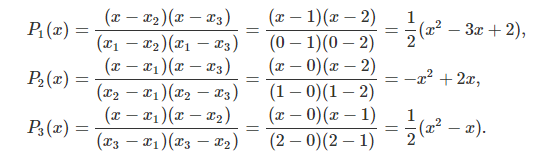

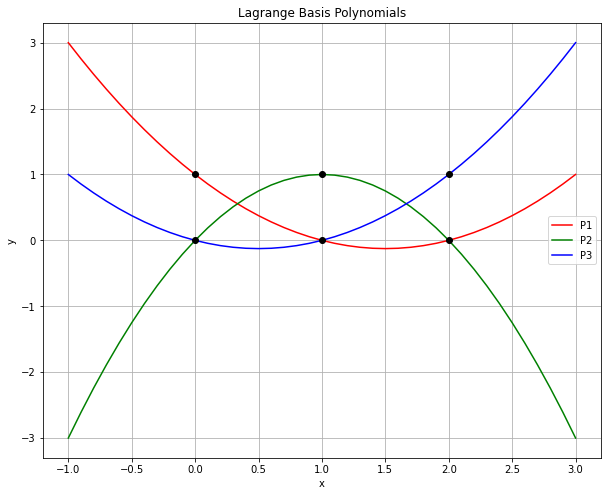

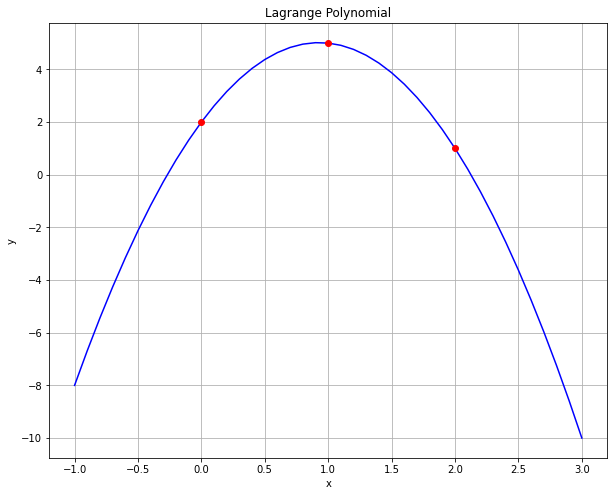

In [12]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [2, 5, 1]
P1_coeff = [1, -1.5, .5]
P2_coeff = [0, 2, -1]
P3_coeff = [0, -.5, .5]

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'r', label = 'P1')
plt.plot(x_new, P2(x_new), 'g', label = 'P2')
plt.plot(x_new, P3(x_new), 'b', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# Now, we can compute and plot the Lagrange polynomial and verify that it does
# indeed go through each set of the data points
L = 2*P1 + 5*P2 + P3
fig2 = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can also opt to instead use lagrange from the scipy library. Note that the results in both examples have the same plot.

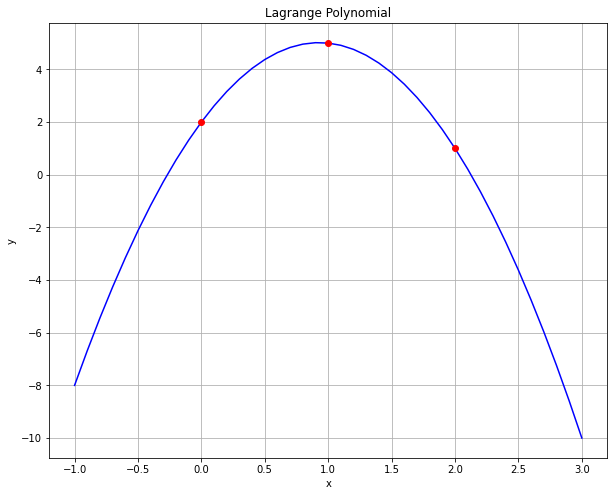

In [13]:
from scipy.interpolate import lagrange
f = lagrange(x, y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.5 Newton's Polynomial Interpolation**

Newton's polynomial interpolation is another popular way of fitting exactly for a set of data points. It is special in that the coefficients can be determined using a very simple mathematical procedure.

In this example. we will calculate Newton's polynomial for the data

x = [-6, -2, 0, 3], y = [-3, 0, 3, 4]

To do this, we will need to compute a divided differences table. It will calculate the coefficients of the interpolation polynomial. 


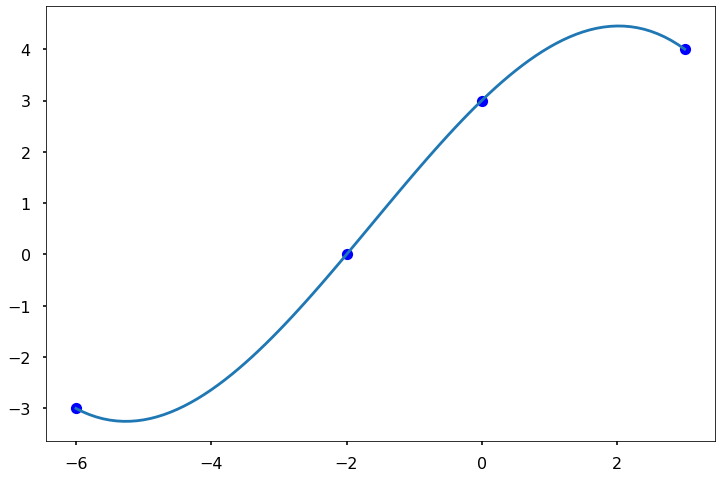

In [18]:
from io import IncrementalNewlineDecoder

%matplotlib inline

def divided_differences(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y

  for j in range(1, n):
    for i in range(n - j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

  return coef

def newtons(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1, n+1):
    p = coef[n-k] + (x - x_data[n-k]) * p
  return p

x = np.array([-6, -2, 0, 3])
y = np.array([-3, 0, 3, 4])
dd_coeff = divided_differences(x, y)[0,:]

x_new = np.arange(-6, 3.1, .1)
y_new = newtons(dd_coeff, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)